<a href="https://colab.research.google.com/github/canerskrc/Borusan_Kod_Adi_Dijital/blob/main/Borusan_day16_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kümeleme

Optimize = max(intra_cluster similarity - inter_cluster similarity)

##Neden Önemli

- Etiketli veri yok. Maliyet çok yüksek.

- Bilgi çıkarımı. Yeni desenler yeni segmentler ortaya çıkar.

- Veri sıkıştırma. Büyük verileri küçük temsil kümeleriyle özetler.

- Ön adım. Başka algoritmaların öncesinde bir temsil öğrenme adımıdır.

!!! Kümeleme temelde optimizasyon problemidir!!!

### Hard & Soft Clustering - Kavramsal Farklar

Hard clustering veri noktalarını sadece bir kümeye atama.

Her bir veri noktası en yakın centroid'e atanır. ( Öklid yaklaşımı )

K-Means

Soft Clustering veri noktalarını kümelere olasılık dağılımı ile atar.

-GMM( Gaussian Mixture Models) , Fuzzy C-Means ( FCM ) , Soft K-Means, BNM ( Bayesian Nonparametric Methods )



## Kümelerin Matematiksel Modelleri ve Algoritmaları

A- Centroid Based ( Kmeans, Kmedoids )

B- Density Based ( DBSCAN, OPTICS )

C- Connectivity / Hierarchical

D- Distribution Based ( GMM )

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

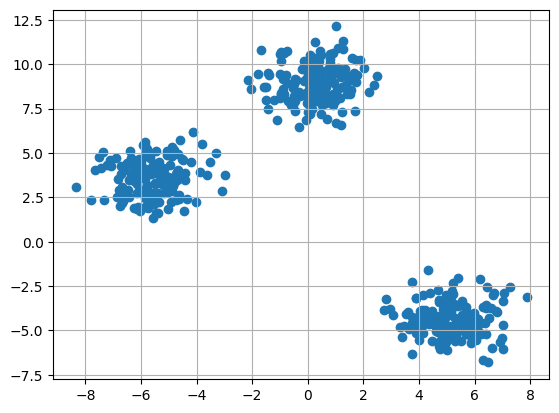

In [24]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 3, random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [25]:
k = 3
clusters = {}
np.random.seed(23)
for idx in range(k):
  center = 2*(2*np.random.random((X.shape[1],))-1)
  points = []
  cluster={
      'center' : center,
      'points' : []
  }
  clusters[idx] = cluster
clusters

#{0:{'center':array([0.38, 1.56]), 'points':[]},
 #1:{''}}

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

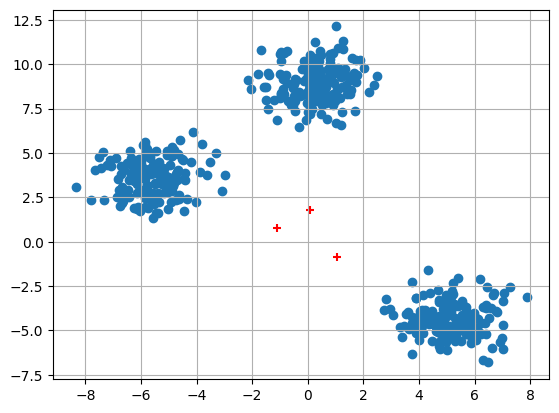

In [26]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1], marker= '+', c= 'red')
plt.show()

In [27]:
def distance(l1,l2):
  return np.sqrt(np.sum((l1-l2)**2))

In [28]:
def assign_clusters(X, clusters):
  for idx in  range(X.shape[0]):
    dist = []
    curr_x = X[idx]
    for i in range(k):
      dis = distance(curr_x, clusters[i]['center'])
      dist.append(dis)
    curr_cluster = np.argmin(dist)
    clusters[curr_cluster]["points"].append(curr_x)
  return clusters

def update_clusters(X,clusters):
  for i in range(k):
    points = np.array(clusters[i]['points'])
    if points.shape[0] > 0:
      new_center = points.mean(axis=0)
      clusters[i]['center'] = new_center

      clusters[i]['points'] = [] #aynı nokta birkaç kez sayılmaması için eski noktaları temizleriz.
  return clusters



In [29]:
def pred_cluster(X,clusters):
  pred = []
  for i in range(X.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance(X[i], clusters[j]['center']))
    pred.append(np.argmin(dist))
  return pred

In [30]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

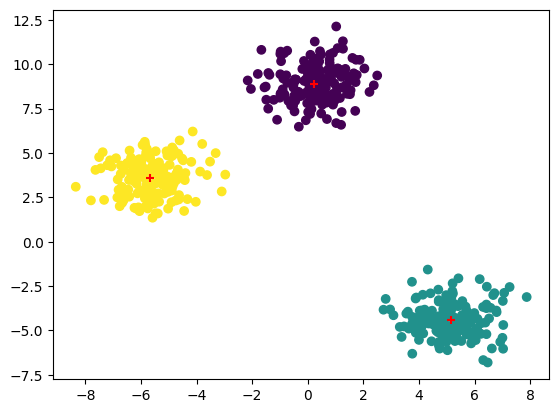

In [31]:
plt.scatter(X[:,0],X[:,1], c = pred)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1], marker='+', c= 'red')
plt.show()

In [33]:
def distance(l1,l2):
  return np.sqrt(np.sum((l1-l2)**2))

def calculate_wcss(X,clusters):
  wcss=0
  for i in range(len(clusters)):
    points = np.array(clusters[i]['points'])
    center = clusters[i]['center']
    for p in points:
      wcss += distance(p, center) **2
  return wcss


def elbow_method(X, max_k = 10):
  wcss_values = []

  for k in range(1,max_k+1):
    clusters = {}
    np.random.seed(23)
    for idx in range(k):
      center = 2*(2*np.random.random((X.shape[1],))-1)
      clusters[idx] = {'center': center, 'points': []}

    for _ in range(10):
      clusters = assign_clusters(X,clusters)
      clusters = update_clusters(X,clusters)

    wcss = calculate_wcss(X,clusters)
    wcss_values.append(wcss)

  plt.plot(range(1,max_k+1), wcss_values, marker='o')
  plt.xlabel('Küme Sayısı(k)')
  plt.ylabel('Wcss(Varyans)')
  plt.title('Elbow Yöntemi')
  plt.show()
  return wcss_values

